## Prob 9

In [62]:
import numpy as np
from numpy.linalg import inv

In [72]:
def create_x(mean, cov):
    x = np.random.multivariate_normal(mean, cov, 1)[0]
    x = np.concatenate([[1], x])
    return x

def create_data(n_samples):
    pos_mean = [3, 2]
    pos_cov = [[0.4, 0], [0, 0.4]]
    neg_mean = [5, 0]
    neg_cov = [[0.6, 0], [0, 0.6]]


    x_set, y_set = [], []
    for _ in range(n_samples):
        # flip the coin
        coin = np.random.choice([-1, 1])
        if coin == 1:
            x = create_x(pos_mean, pos_cov)
            y = 1
        else:
            x = create_x(neg_mean, neg_cov)
            y = -1
        
        x_set.append(x)
        y_set.append(y)

    return np.array(x_set), np.array(y_set)

<AxesSubplot:ylabel='Count'>

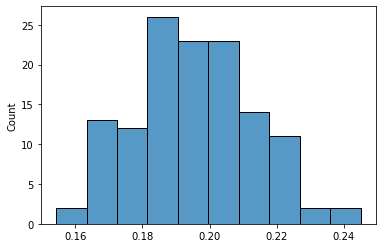

In [140]:
from seaborn import histplot
histplot(ein_logs)

In [141]:
np.median(np.array(ein_logs))

0.19605514356030196

## Prob 10

In [143]:
N_EPOCHS = 128
N_TRAIN_DATA = 256

ein_logs = []
for i in range(N_EPOCHS):
    np.random.seed(i)
    x_train, y_train = create_data(N_TRAIN_DATA)
    w = np.dot(np.dot(inv(np.dot(x_train.T, x_train)), x_train.T), y_train)

    preds = np.dot(x_train, w)
    ein = 1 / len(x_train) * np.sum(y_train * preds <= 0)
    ein_logs.append(ein)

<AxesSubplot:ylabel='Count'>

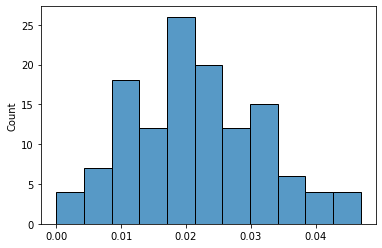

In [144]:
from seaborn import histplot
histplot(ein_logs)

In [146]:
np.median(np.array(ein_logs))

0.01953125

## Prob 11

In [173]:
def zero_one_error(preds, y_test, n_sample):
    ys = y_test * preds
    eout = 1 / n_sample * np.sum(ys <= 0)
    return eout

def sigmoid(x) -> np.array:
    return 1 / (1 + np.exp(-1 * x))

In [202]:
from sklearn.linear_model import LogisticRegression

N_EPOCHS = 128
N_ITERATIONS, LR = 500, 0.1 # For logistic regression
N_TRAIN_DATA = 256
N_TEST_DATA = 4096

used_package = False

eout_logs = []
for i in range(N_EPOCHS):
    # Create train/test data
    np.random.seed(i)
    x_train, y_train = create_data(N_TRAIN_DATA)
    x_test, y_test = create_data(N_TEST_DATA)
    
    # For linear regression
    w = np.dot(np.dot(inv(np.dot(x_train.T, x_train)), x_train.T), y_train)
    preds = np.dot(x_test, w)
    eout_linear = zero_one_error(preds, y_test, len(x_test))
    
    # For logistic regression
    if used_package:
        clf = LogisticRegression(penalty="none", random_state=i, max_iter=N_ITERATIONS).fit(x_train, y_train)
        preds = clf.predict(x_test)
    else:
        w = np.array([0.0 for _ in range(x_train.shape[1])])
        for j in range(N_ITERATIONS):
            k = sigmoid(-1 * y_train.T * np.dot(x_train, w))
            c = -1 * y_train[:, np.newaxis] * x_train
            gradient = 1 / len(x_train) * np.sum(k[:, np.newaxis] * c, axis=0)
            w -= LR * gradient
        
        preds = np.dot(x_test, w)
    eout_logistic = zero_one_error(preds, y_test, len(x_test))
    
    print("eout_linear:{}, eout_logisitc:{}".format(eout_linear, eout_logistic))
    eout_logs.append([eout_linear, eout_logistic])

eout_linear:0.021484375, eout_logisitc:0.037353515625
eout_linear:0.0244140625, eout_logisitc:0.03466796875
eout_linear:0.028564453125, eout_logisitc:0.0322265625
eout_linear:0.02099609375, eout_logisitc:0.032958984375
eout_linear:0.022705078125, eout_logisitc:0.037353515625
eout_linear:0.02099609375, eout_logisitc:0.034912109375
eout_linear:0.023193359375, eout_logisitc:0.027587890625
eout_linear:0.02197265625, eout_logisitc:0.03369140625
eout_linear:0.031494140625, eout_logisitc:0.03955078125
eout_linear:0.023681640625, eout_logisitc:0.03076171875
eout_linear:0.020751953125, eout_logisitc:0.032470703125
eout_linear:0.02294921875, eout_logisitc:0.03662109375
eout_linear:0.021728515625, eout_logisitc:0.03466796875
eout_linear:0.023193359375, eout_logisitc:0.033935546875
eout_linear:0.02099609375, eout_logisitc:0.030029296875
eout_linear:0.021240234375, eout_logisitc:0.0361328125
eout_linear:0.02294921875, eout_logisitc:0.034912109375
eout_linear:0.022216796875, eout_logisitc:0.02954101

<AxesSubplot:xlabel='linear_regression', ylabel='logistic_regression'>

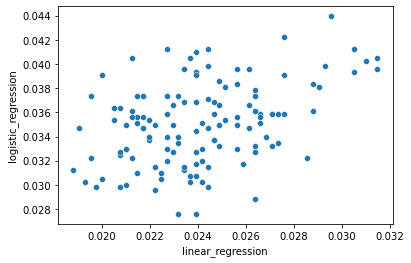

In [219]:
import pandas as pd
from seaborn import scatterplot
df = pd.DataFrame(eout_logs, columns=["linear_regression", "logistic_regression"])
scatterplot(data=df, x="linear_regression", y="logistic_regression")

In [225]:
print("Median of eout on linear regression : ", df["linear_regression"].median())
print("Median of eout on linear regression : ", df["logistic_regression"].median())

Median of eout on linear regression :  0.02392578125
Median of eout on linear regression :  0.03515625


## Prob 12

In [232]:
def create_outlier(n_samples):
    mean = [0, 6]
    cov = [[0.1, 0], [0, 0.3]]
    
    x = np.random.multivariate_normal(mean, cov, n_samples)
    bias = np.array([[1] for _ in x])
    x = np.concatenate([bias, x], axis=1)
    y = np.array([1 for _ in range(n_samples)])
    
    return x, y

In [239]:
from sklearn.linear_model import LogisticRegression

N_EPOCHS = 128
N_ITERATIONS, LR = 500, 0.1 # For logistic regression
N_TRAIN_DATA = 256
N_TEST_DATA = 4096
N_OUTLIER = 16

used_package = False

eout_logs = []
for i in range(N_EPOCHS):
    # Create train/test data
    np.random.seed(i)
    x_train, y_train = create_data(N_TRAIN_DATA)
    x_test, y_test = create_data(N_TEST_DATA)
    
    # Add outlier to train data

    x_outlier, y_outlier = create_outlier(N_OUTLIER)
    x_train = np.concatenate([x_train, x_outlier])
    y_train = np.concatenate([y_train, y_outlier])
    
    # For linear regression
    w = np.dot(np.dot(inv(np.dot(x_train.T, x_train)), x_train.T), y_train)
    preds = np.dot(x_test, w)
    eout_linear = zero_one_error(preds, y_test, len(x_test))
    
    # For logistic regression
    if used_package:
        clf = LogisticRegression(penalty="none", random_state=i, max_iter=N_ITERATIONS).fit(x_train, y_train)
        preds = clf.predict(x_test)
    else:
        w = np.array([0.0 for _ in range(x_train.shape[1])])
        for j in range(N_ITERATIONS):
            k = sigmoid(-1 * y_train.T * np.dot(x_train, w))
            c = -1 * y_train[:, np.newaxis] * x_train
            gradient = 1 / len(x_train) * np.sum(k[:, np.newaxis] * c, axis=0)
            w -= LR * gradient
        
        preds = np.dot(x_test, w)
    eout_logistic = zero_one_error(preds, y_test, len(x_test))
    
    print("eout_linear:{}, eout_logisitc:{}".format(eout_linear, eout_logistic))
    eout_logs.append([eout_linear, eout_logistic])

eout_linear:0.030029296875, eout_logisitc:0.037109375
eout_linear:0.0302734375, eout_logisitc:0.03466796875
eout_linear:0.037353515625, eout_logisitc:0.0322265625
eout_linear:0.028564453125, eout_logisitc:0.032958984375
eout_linear:0.024658203125, eout_logisitc:0.037353515625
eout_linear:0.029296875, eout_logisitc:0.03515625
eout_linear:0.03759765625, eout_logisitc:0.027587890625
eout_linear:0.03515625, eout_logisitc:0.03369140625
eout_linear:0.02978515625, eout_logisitc:0.03955078125
eout_linear:0.02490234375, eout_logisitc:0.03125
eout_linear:0.026611328125, eout_logisitc:0.032470703125
eout_linear:0.02099609375, eout_logisitc:0.03662109375
eout_linear:0.030029296875, eout_logisitc:0.03466796875
eout_linear:0.040771484375, eout_logisitc:0.033935546875
eout_linear:0.03369140625, eout_logisitc:0.030517578125
eout_linear:0.025634765625, eout_logisitc:0.035888671875
eout_linear:0.0322265625, eout_logisitc:0.03515625
eout_linear:0.032958984375, eout_logisitc:0.029541015625
eout_linear:0.0

<AxesSubplot:xlabel='linear_regression', ylabel='logistic_regression'>

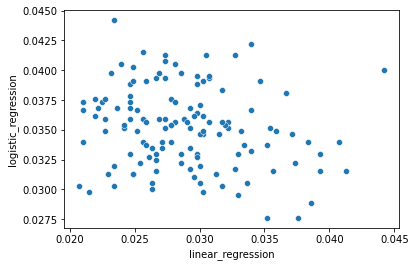

In [240]:
import pandas as pd
from seaborn import scatterplot
df = pd.DataFrame(eout_logs, columns=["linear_regression", "logistic_regression"])
scatterplot(data=df, x="linear_regression", y="logistic_regression")

In [241]:
print("Median of eout on linear regression : ", df["linear_regression"].median())
print("Median of eout on linear regression : ", df["logistic_regression"].median())

Median of eout on linear regression :  0.0283203125
Median of eout on linear regression :  0.03515625


## Prob 5

In [26]:
import numpy as np
from numpy.linalg import inv

x_train, y_train = np.array([[1, 1, 4], [1, 5, 4], [1, 4, 8], [1, 6, 3]]), np.array([[2], [4], [5], [8]])

for i in range(1, 3):
    for j in range(0, 8):
        y_train_scaled = i * y_train + j
        w = np.dot(np.dot(inv(np.dot(x_train.T, x_train)), x_train.T), y_train_scaled)
        print("i:{}, j:{}".format(i, j))
        print(w)

i:1, j:0
[[ 0.84197531]
 [ 0.99753086]
 [-0.01728395]]
i:1, j:1
[[ 1.84197531]
 [ 0.99753086]
 [-0.01728395]]
i:1, j:2
[[ 2.84197531]
 [ 0.99753086]
 [-0.01728395]]
i:1, j:3
[[ 3.84197531]
 [ 0.99753086]
 [-0.01728395]]
i:1, j:4
[[ 4.84197531]
 [ 0.99753086]
 [-0.01728395]]
i:1, j:5
[[ 5.84197531]
 [ 0.99753086]
 [-0.01728395]]
i:1, j:6
[[ 6.84197531]
 [ 0.99753086]
 [-0.01728395]]
i:1, j:7
[[ 7.84197531]
 [ 0.99753086]
 [-0.01728395]]
i:2, j:0
[[ 1.68395062]
 [ 1.99506173]
 [-0.0345679 ]]
i:2, j:1
[[ 2.68395062]
 [ 1.99506173]
 [-0.0345679 ]]
i:2, j:2
[[ 3.68395062]
 [ 1.99506173]
 [-0.0345679 ]]
i:2, j:3
[[ 4.68395062]
 [ 1.99506173]
 [-0.0345679 ]]
i:2, j:4
[[ 5.68395062]
 [ 1.99506173]
 [-0.0345679 ]]
i:2, j:5
[[ 6.68395062]
 [ 1.99506173]
 [-0.0345679 ]]
i:2, j:6
[[ 7.68395062]
 [ 1.99506173]
 [-0.0345679 ]]
i:2, j:7
[[ 8.68395062]
 [ 1.99506173]
 [-0.0345679 ]]


In [27]:
import numpy as np
from numpy.linalg import inv

x_train, y_train = np.array([[1, 4], [5, 4]]), np.array([[2], [4]])

for i in range(1, 3):
    for j in range(0, 8):
        y_train_scaled = i * y_train + j
        w = np.dot(np.dot(inv(np.dot(x_train.T, x_train)), x_train.T), y_train_scaled)
        print("i:{}, j:{}".format(i, j))
        print(w)

i:1, j:0
[[0.5  ]
 [0.375]]
i:1, j:1
[[0.5  ]
 [0.625]]
i:1, j:2
[[0.5  ]
 [0.875]]
i:1, j:3
[[0.5  ]
 [1.125]]
i:1, j:4
[[0.5  ]
 [1.375]]
i:1, j:5
[[0.5  ]
 [1.625]]
i:1, j:6
[[0.5  ]
 [1.875]]
i:1, j:7
[[0.5  ]
 [2.125]]
i:2, j:0
[[1.  ]
 [0.75]]
i:2, j:1
[[1.]
 [1.]]
i:2, j:2
[[1.  ]
 [1.25]]
i:2, j:3
[[1. ]
 [1.5]]
i:2, j:4
[[1.  ]
 [1.75]]
i:2, j:5
[[1.]
 [2.]]
i:2, j:6
[[1.  ]
 [2.25]]
i:2, j:7
[[1. ]
 [2.5]]
